In [110]:
%matplotlib inline
import sqlite3
import matplotlib.pyplot as plt
import datetime as dt
from math import *


#update the db, note you will need to be kinit'ed for this to work (with your username)
#!scp mibass@uboonegpvm01.fnal.gov:/uboone/app/home/uboonepro/NearLine/lifetime.sqlite ./

#open db
conn = sqlite3.connect('lifetime.sqlite')
c=conn.cursor()

#Most data is in ltdata table:
#ltdata(ltid INTEGER PRIMARY KEY, groupid INT, fname TEXT, start INT, end INT, QA REAL, QA_err REAL, QC REAL, QC_err REAL, QCQA REAL, QCQA_er REAL, sumntracks INT, sumntrackscross INT, sumntrackssel INT, avgtrklen REAL, rmstrklen REAL)
#ltid - id of this measurement
#groupid - which group does this measurement belong to? 
#       (2=50 tracks, 3=100 tracks, 4=300 tracks)
#fname - what file is the analysis stored in?
#start - start unix timestamp of this measurement
#end - end unix timestamp of this measurement
#QA - QA value from lifetime analysis
#QA_err - RMS error on QA
#QC - QC value from lifetime analysis
#QC_err  - RMS error on QC
#QCQA - QC/QA
#QCQA_er REAL - (note typo) RMS error in QC/QA value
#sumntracks - total number of tracks found in merged file
#sumntrackscross - total number of crossing tracks in merged file
#sumntrackssel - number of tracks selected for analysis
#avgtrklen - average track length for all tracks
#rmstrklen - RMS value of track lengths for all tracks


#convenient function for plotting a query
def plotquery(sql, variance=False):
    x=[]
    y=[]
    yerr=[]

    for row in c.execute(sql):
        if row[1] is not None:
            x.append(row[0])
            y.append(row[1])
        else:
            continue
        if len(row)>2: sqrt(yerr.append(float(row[2]))) if variance else yerr.append(row[2])

    dates=[dt.datetime.fromtimestamp(ts) for ts in x]

    fig,ax = plt.subplots(figsize=(25,4))
    if len(yerr)>0:
        ax.errorbar(dates,y,yerr=yerr, fmt='o')
    else:
        ax.plot(dates,y)

    return fig,ax

lifetime.sqlite                               100%  115MB   2.2MB/s   00:52    


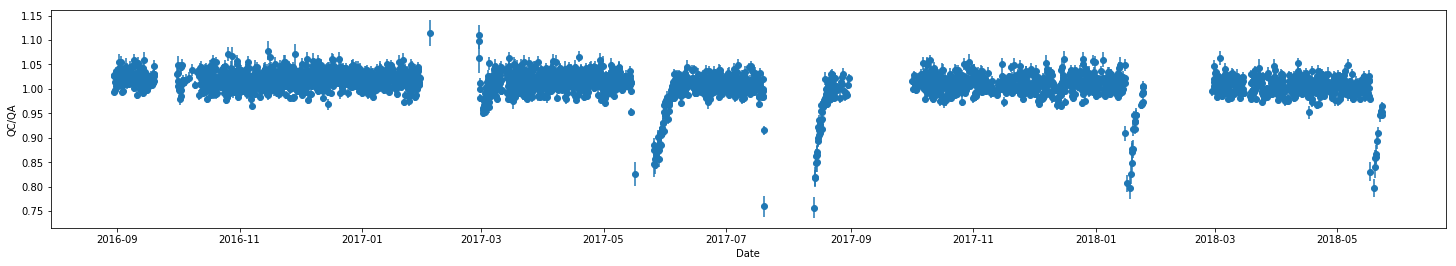

In [111]:
sql = "select start,QCQA,QCQA_er from ltdata where groupid=4"
fig,ax=plotquery(sql)
plt.xlabel('Date')
plt.ylabel('QC/QA')
plt.show()



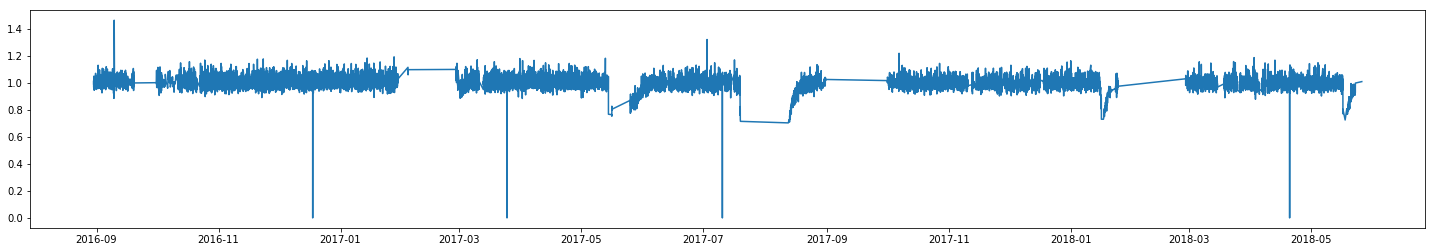

In [104]:
fig,ax = plotquery('select start, QCQA from ltdata order by start')
plt.show()


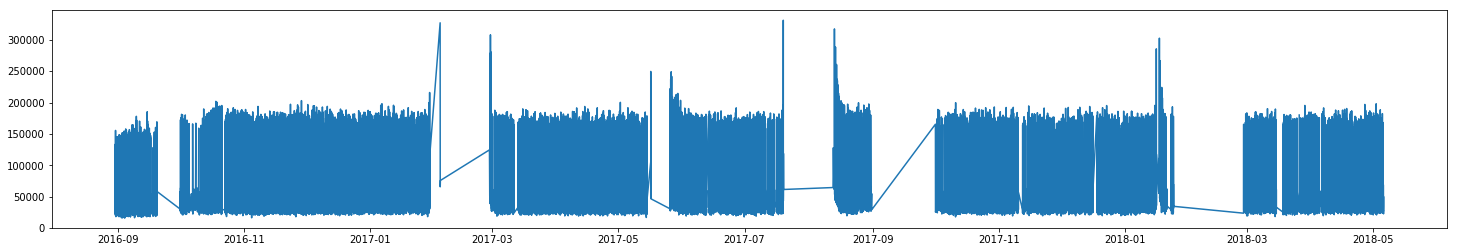

In [27]:
fig,ax = plotquery('select start, sumntracks from ltdata order by start')
plt.show()

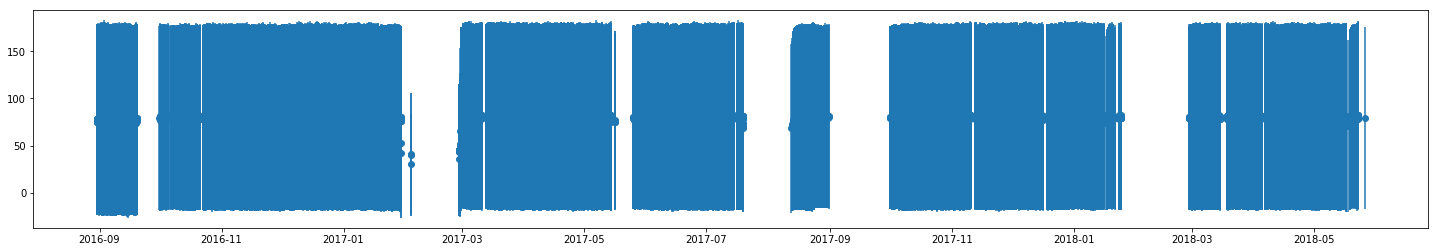

In [106]:
fig, ax = plotquery('select start, avgtrklen, rmstrklen from ltdata')
plt.show()